<a href="https://www.kaggle.com/code/dascient/auto-recruitment-recruitment-as-a-service-araas?scriptVersionId=254636184" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Auto-Recruitment Algorithm Developnment
# Project by Don Tadaya, Corey Slocum

# Resources
# https://towardsdatascience.com/resume-screening-with-python-1dea360be49b
# https://www.analyticsvidhya.com/blog/2021/06/resume-screening-with-natural-language-processing-in-python/
#

from IPython.display import clear_output

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install openpyxl
clear_output()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/interviews/Interviews.xlsx
/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


## [See part 2 here.](https://www.kaggle.com/code/dascient/auto-recruitment-as-a-service-araas-2-0)

# Matching Algorithm
[Article](https://skillate.com/blog/how-does-ml-based-job-resume-matching-algorithm-work-2/)

Matching Algorithm is the AI-powered algorithm to compute the matching score between a job and a resume. The algorithm (powered by the Deep Neural Network) uses multiple matching signals that broadly include:

**Experience**
Industry
Years of Experience
Title or Designations on three layers - based on title, role, and role category.
Seniority Level Matching.
Example: CTO of a 25 members company and having five years of experience doesn't mean he is qualified for VP Technology in any Multinational Companies.

**Education**
College Relevance - according to the requirement mentioned in the job description else, no biases in college preference.
Degree
Major - which is closely related to the job skills requirements.

**Skills**
Functional Skills Example: JAVA, Enterprise Sales, Invoice Processing, etc.
Behavioral Skills Example: Critical Thinking, Communication Skills, etc.
Recent Candidate Skills
The Matching Algorithm uses the above matching variables in computing three scores - Skill, Education, and Experience. And according to the weights (which can be configured by the organization) given help in calculating Overall Matching Score.

In [2]:
# read in data
interviews = pd.read_excel('/kaggle/input/interviews/Interviews.xlsx',header=0)
resumes = pd.read_csv('/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv',header=0)

# EDA

In [3]:
interviews#.Experience[0]

,Unnamed: 0,index,ID,Date,Titles,Company,Experience,Upvotes,URLS
0,0,0,420303,2020-05-29,Find the K closest points to origin using Prio...,Amazon,"Given a list of n points on 2D plane, the task...",3,https://www.geeksforgeeks.org/find-the-k-close...
1,1,1,417918,2020-05-26,Amazon Interview Experience | SDE (1.5 Year Ex...,Amazon,Round 1 – Online Coding Round on Amcat Platfor...,3,https://www.geeksforgeeks.org/amazon-interview...
2,2,2,415868,2020-05-21,Amazon Scotland Interview Experience - Geeksfo...,Amazon,Amazon Scotland was hiring for the position of...,1,https://www.geeksforgeeks.org/amazon-scotland-...
3,3,3,412077,2020-05-14,AWS Cloud Support Associate Interview Experien...,Amazon,Hi everyone. I got placed as Cloud Support Ass...,0,https://www.geeksforgeeks.org/aws-cloud-suppor...
4,4,4,401491,2020-05-09,Print all nodes at distance K from given node:...,Amazon,"Consider the above-given Tree, For the targ...",5,https://www.geeksforgeeks.org/print-all-nodes-...
...,...,...,...,...,...,...,...,...,...
7763,7763,0,341288,2019-09-03,Societe Generale Internship Interview Experien...,Societe Generale Global Solution,"After that, they shortlisted 40 students and...",0,https://www.geeksforgeeks.org/societe-generale...
7764,7764,1,334184,2019-08-18,Societe Generale Campus Placement Drive - Geek...,Societe Generale Global Solution,Societe Generale was one of the first few comp...,1,https://www.geeksforgeeks.org/societe-generale...
7765,7765,2,332173,2019-08-09,Societe Generale Interview Experience (Campus ...,Societe Generale Global Solution,Societe Generale was the first few companies t...,2,https://www.geeksforgeeks.org/societe-generale...
7766,7766,3,138825,2016-08-09,Societe Generale Global Solution Interview Exp...,Societe Generale Global Solution,2nd Round: Group Discussion Topic: Start-Up...,0,https://www.geeksforgeeks.org/societe-generale...


In [4]:
resumes.Resume

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

<AxesSubplot:>

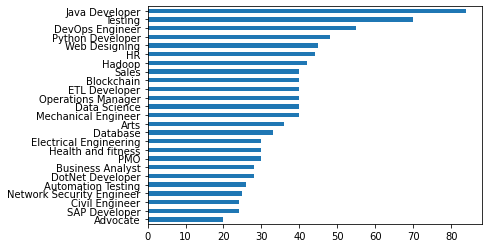

In [5]:
resumes.Category.value_counts().sort_values().plot(kind='barh')

In [ ]:
# Convert all strings to lowercase
text = text.lower()

# Remove numbers
text = re.sub(r'\d+','',text)

# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

In [ ]:
terms = {'Quality/Six Sigma':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system']}


In [ ]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

# Key Indicators: Candidate

# Key Indicators: Recruiter

# Match Making

# LOE Savings & Logistic Analytics

In [ ]:
# Determine avg recruiter salary.
# Determine no. of hours dedicated to discovery & interviewing process.
# Determine costSavings per hour.